# Lab Two: Exploring Image Data

- https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

# 1. Business Understanding
- Malaria is a life-threatening disease spread to humans by mosquitoes, and is considered to be a severe public health issue. According to the World Health Organization, globally in 2022, there were an estimated 249 million malaria cases and 608,000 malaria deaths in 85 countries (source: https://www.who.int/news-room/fact-sheets/detail/malaria). The WHO African Region carries a disproportionate amount of the global malaria burden at 94% of malaria cases (233 million) and 95% (580,000) of malaria deaths. The infection caused by a parasite from the mosquito is preventable and curable. One method of preventing malaria is through thorough surveillance of it.

- The `Malaria Cell Images Dataset` contains over 27,000 images of cells that are labeled as either `parasitized` or `uninfected`. Each image will be converted to greyscale and resized to a 64x64 pixel image for data processing. The dataset was collected to improve the detection of malaria via image classification, in order to reduce the burden of malaria worldwide. According to the National Library of Medicine, existing drugs make malaria a curable disease, but inadequate diagnostics and emerging drug resistances are major barriers to successful mortality reduction. Therefore, the development of a fast and reliable diagnostic method is one of the most promising methods to fight malaria (source: https://lhncbc.nlm.nih.gov/LHC-research/LHC-projects/image-processing/malaria-project.html). 

- Accurate parasite counts are essential to diagnosing malaria correctly. However, performing microscopic diagnostics is not standardized in every region and depends on the skills and experience of the microscopist. In areas of lower resources, diagnostic quality can be negatively impacted, leading to incorrect diagnostics. In instances where false negative cases arise, this means unnecessary use of antibiotics, a second consultation, or even severe progression in malaria. In instances with false positive cases, a misdiagnosis means unnecessary use of anti-malaria treatments and resource depletion for those who might actually be suffering from malaria. The prediction algorithm for our case would need to be highly accurate, and avoid both false negatives and false positives altogether for it to be successful. We would measure the part of the success of our algorithm using metrics like `precision` and `recall`. High precision would ensure fewer false positives, while high recall ensures fewer false negatives. An `F1 score` that balances both metrics would provide a comprehensive assessment of the model's performance. It is impractical to believe that our prediction algorithm could reach 100% accuracy in classifying whether a cell is infected or not because some who may have been infected may not experience severe symptoms due to prior past infections or immunities. When considering our measure for a successful algorithm, we considered third parties that would be interested in the results.

- Accurate and precise malaria diagnostics would benefit `public health organizations`, `disease researchers`, and `hospitals`. Public health organizations, such as WHO, would benefit from our binary classification analysis because they can use our data to accurately diagnose someone with malaria, and provide appropriate treatment options to reduce the severity of the disease and prevent mortality. In areas that lack adequate and appropriate resources, having a tool that accurately and precisely detects malaria could save the lives of millions, especially in the WHO African Region. Due to its disproportionate amount of global malaria burden, the WHO African Region cannot afford to have false negatives or false positives, since that would deplete their malaria treatment resources without adequately addressing the issue. As a result, we want our prediction algorithm to achieve a `95-97%` accuracy in classifying whether a cell is infected with malaria or not. We also want to ensure the precision of our algorithm aligns with the accuracy in order to ensure we are not getting a disproportionate amount of false negatives and false positives, which we want to try to avoid. The target of 95-97% is based on the current state of diagnostic tools, such as EasyScan Go, where human microscopists typically achieve accuracy rates of around 85-90% (source: https://malariajournal.biomedcentral.com/articles/10.1186/s12936-022-04146-1). Achieving a 5-10% improvement from EasyScan Go is doable, as high quality smears and stainings are paramount in allowing a machine-learning algorithm to analyze infected cells, which is something EasyScan Go's current technology is unable to achieve at the moment. For example, incorporating noise reduction parameters can aid the screening tool in more accurately identifying and diagnosing an infected cell. 

- Another stakeholder that would appreciate our data are disease researchers. By studying the patterns that are exhibited from infected and uninfected cells, researchers can develop treatment plans that can aid in preventing or even treating the infections. According to WHO, partial resistance in antimalarial drugs has emerged in the WHO African Region (source: https://www.who.int/news-room/fact-sheets/detail/malaria). By being able to classify malaria cells accurately and precisely, and discovering patterns and trends of malaria, disease researchers can develop new antimalarial drugs that are less likely to develop resistance in those infected. The faster the diagnosis, the quicker the appropriate response, which can delay or prevent the onset of drug resistance.

- Lastly, hospitals can benefit from this screening tool as it can allocate appropriate resources to those who are infected or uninfected. By having a prediction algorithm of 95-97% accuracy and precision, hospitals can more confidently start treatment plans for those infected. If a false positive arises, the worst case is using malaria treatment on someone who does not need it. The only issue with this occurs when the hospital is in an area with limited supplies, or a public health emergency emerges. In this case, the accuracy and precision of our algorithm needs to be 97% and higher, in order to conserve as much resources as possible. However, in general, hospitals would benefit from this malaria screening tool because they can plan ahead for the resources they'll need by geographic location. 

- The prediction task for this dataset is a binary classification to detect whether a cell is parasitized or not with malaria, essentially developing an accurate and precise screening tool for malaria. Key stakeholders that would be interested in our results are public health organizations, disease researchers, and hospitals. This data is important because early and accurate detection of malaria can improve patient outcomes and reduce the burden of the disease. This data could also facilitate faster, more scalable diagnostics in essential regions where traditional microscopy is either too slow or resource-intensive. Achieving higher accuracy and precision with our algorithm would reduce the strain on healthcare workers and improve diagnostic precision in regions with limited medical expertise, ultimately to reduce the burden of malaria worldwide. Lastly, using metrics like precision and recall, and an F1 score can provide an assessment of our model's overall performance. This dataset can have important global implications, offering scalable solutions for regions that face sporadic and disproportionate malaria outbreaks. 

- Dataset: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria


# 2. Data Preparation

In [1]:
# Modules and Libraries
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from collections import Counter

In [2]:
# Defining the directory path that contains subdirectories 
image_dir = 'C:/Users/Juan Dominguez/Desktop/Malaria_Dataset/malaria_ds/cell_images'

# List to store image data
images = [] # To store image after processing (grayscale and resized)
labels = [] # To store the category label for each image ('parasitized' or 'uninfected')

# Iterating through subdirectories
for category in ['parasitized', 'uninfected']:
    category_dir = os.path.join(image_dir, category)
    image_files = [f for f in os.listdir(category_dir) if f.endswith('.png') or f.endswith('.jpg') or f.endswith('.jpeg')]

    for img_file in image_files:
        img_path = os.path.join(category_dir, img_file)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Failed to load image: {img_path}")
            continue
        
        # Resizing the image
        img_resized = cv2.resize(img, (64, 64))
        
        # Converting to grayscale
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        
        images.append(img_gray)  # Storing the grayscale image 
        labels.append(category)  # Storing the label for the image


In [3]:
# Converting list of images to numpy array
images_np = np.array(images)
print(f"Shape of images_np: {images_np.shape}")

Shape of images_np: (27558, 64, 64)


In [4]:
# Linearizing the images: Flattening each image into a 1-D array
n_images, height, width = images_np.shape # Unpacking 3D shape to later reshape
images_flattened = images_np.reshape(n_images, height * width) # Converting 2D image into 1D arr

print(f"Number of images: {n_images}")
print(f"Flattened image shape: {images_flattened.shape}")

Number of images: 27558
Flattened image shape: (27558, 4096)


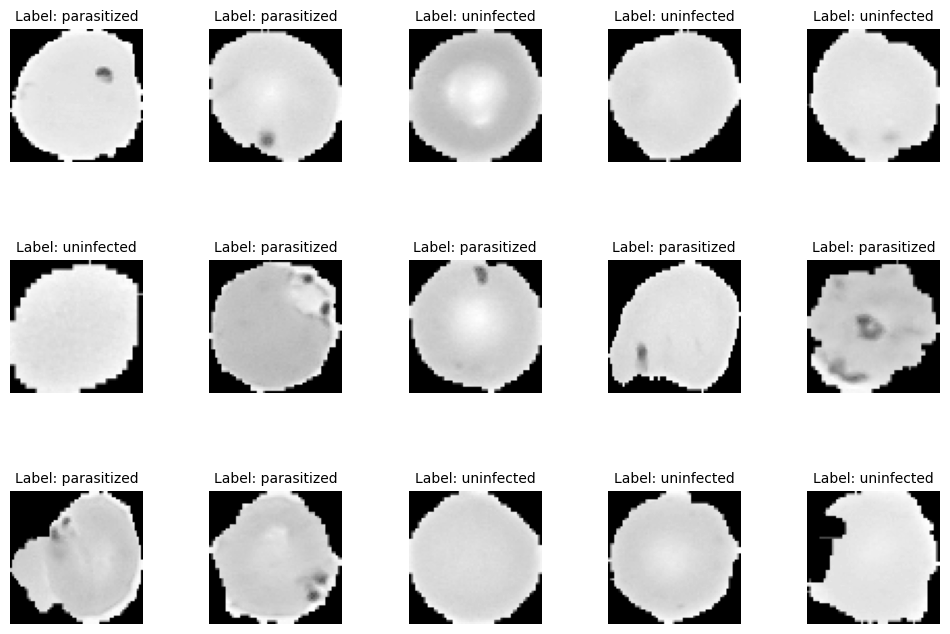

Image 1 - Label: parasitized
Image 2 - Label: parasitized
Image 3 - Label: uninfected
Image 4 - Label: uninfected
Image 5 - Label: uninfected
Image 6 - Label: uninfected
Image 7 - Label: parasitized
Image 8 - Label: parasitized
Image 9 - Label: parasitized
Image 10 - Label: parasitized
Image 11 - Label: parasitized
Image 12 - Label: parasitized
Image 13 - Label: uninfected
Image 14 - Label: uninfected
Image 15 - Label: uninfected


In [5]:
# Visualizing Several Images
# Shuffling images and labels together to display images randomly from dataset
images_np, labels = shuffle(images_np, labels, random_state=42)

# 15 random images with 5 cols and 3 rows
num_images_to_show = 15
plt.figure(figsize=(12, 8)) 
rows, cols = 3, 5 

for i in range(num_images_to_show):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images_np[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {labels[i]}", fontsize=10)  # Labeling each image

# Adding space between the subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# Printing labels for the displayed images
for i in range(num_images_to_show):
    print(f"Image {i+1} - Label: {labels[i]}")


In [6]:
# Counting the occurence of each label in the dataset
label_counts = Counter(labels)

print(f"Number of parasitized images: {label_counts['parasitized']}")
print(f"Number of uninfected images: {label_counts['uninfected']}")

Number of parasitized images: 13779
Number of uninfected images: 13779
